--------------------------------------------------------------------------------
                        CREDIT RISK ASSESSMENT ML PIPELINE
             Building a Production-Ready Credit Risk Classification System
--------------------------------------------------------------------------------

Trimester 2 End-of-Term Project





Name: NEETU PAL

Student ID: IITP_AIML_2506115

Program/Course: Artificial Intelligence and Machine Learning









Submission Date: 29/02/2025

--------------------------------------------------------------------------------


# 1. Introduction -

# Credit Risk Assessment ML Pipeline

## Project Overview

This project builds a Credit Risk Assessment ML Pipeline to classify loan applicants as Good Risk or Bad Risk.

The objective is to simulate a production-ready system including:

* Data generation

* EDA

* Missing value treatment

* Feature engineering

* Encoding

*Train-Test split


# 2. Dataset Explanation-

# Dataset Description

The dataset is synthetically generated to simulate  real-world credit risk data similar to the German Credit dataset.

It includes  demographic, financial, and loan-related features such as:

-Age

-Job

-Housing

-Credit Amount

-Loan Duration

-Account details

The target variable "Risk" indicates:

- Good (0) - Low default risk
- Bad  (1) - High default risk

In [ ]:
#  NOTEBOOK 1 — 01_EDA_Preprocessing.ipynb

#  Section 1 — Import Libraries
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.1/197.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.4/808.4 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

#  Section 2 — Load Dataset

# Set random seed for reproducibility
np.random.seed(42)

# Define the generate_risk function before its use
def generate_risk(row):
    if row['Credit amount'] > 10000 and row['Duration'] > 36:
        return 'Bad'
    elif row['Credit amount'] > 5000 and row['Duration'] > 24 and row['Age'] < 30:
        return 'Bad'
    else:
        return 'Good'

# Generate synthetic credit data
n_samples = 1000
data = {
   'Age': np.random.randint(18, 75, n_samples),
   'Sex': np.random.choice(['male', 'female'], n_samples),
   'Job': np.random.choice([0, 1, 2, 3], n_samples, p=[0.2, 0.4, 0.3, 0.1]),
   'Housing': np.random.choice(['own', 'rent', 'free'], n_samples, p=[0.6, 0.3, 0.1]),
   'Saving accounts': np.random.choice(['little', 'moderate', 'quite rich', 'rich', np.nan],
                                      n_samples, p=[0.4, 0.3, 0.1, 0.1, 0.1]),
   'Checking account': np.random.choice(['little', 'moderate', 'rich', np.nan],
                                       n_samples, p=[0.5, 0.25, 0.15, 0.1]),
   'Credit amount': np.random.randint(250, 20000, n_samples),
   'Duration': np.random.randint(4, 72, n_samples),
   'Purpose': np.random.choice(['car', 'furniture', 'radio/TV', 'education', 'business',
                               'domestic appliances', 'repairs', 'vacation/others'],
                              n_samples, p=[0.3, 0.15, 0.2, 0.1, 0.1, 0.05, 0.05, 0.05])
}

df=pd.DataFrame(data)
df['Risk'] = df.apply(generate_risk, axis=1)
df.to_csv('german_credit_data.csv', index=False)
print(f"Dataset created: {len(df)} rows")
print(f"Risk distribution:\n{df['Risk'].value_counts()}")

df.head()

Dataset created: 1000 rows
Risk distribution:
Risk
Good    709
Bad     291
Name: count, dtype: int64


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,56,male,1,own,little,moderate,6745,22,car,Good
1,69,female,2,free,moderate,moderate,10437,70,car,Bad
2,46,male,3,own,quite rich,little,9763,8,car,Good
3,32,female,1,own,moderate,little,18964,70,radio/TV,Bad
4,60,male,2,own,moderate,little,17650,14,domestic appliances,Good


In [ ]:
# Section 3 - Basic info

df.shape
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


np.int64(0)

# 3. EDA Explanation

#EDA [Exploratory data analysis]

  EDA is performed to understand:
  - Target class distribution
  - Feature Distributions
  - Relationship between features and target
  - Correlation between numerical variables


  This helps identify patterns and potential predictors of credit risk.
  

<Axes: xlabel='Housing', ylabel='Credit amount'>

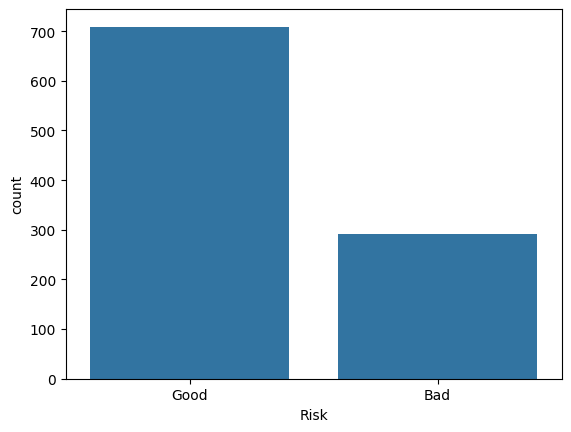

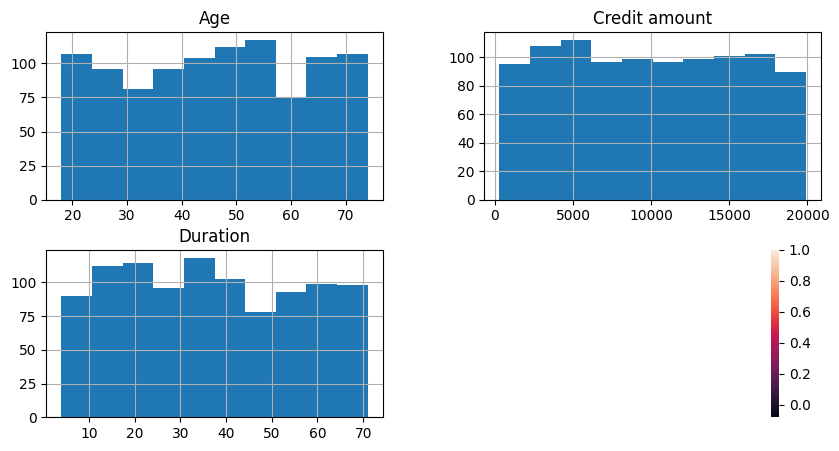

In [ ]:
# Section 4- EDA Graphs

# 1. Target Distribution

import seaborn as sns
sns.countplot(x='Risk',data=df)


# 2. Histograms

df[['Age','Credit amount', 'Duration']].hist(figsize=(10,5))


# 3. Boxplots

sns.boxplot(x='Risk', y='Credit amount', data=df)
sns.boxplot(x='Risk',y='Age',data=df)


#4. Correlation Heatmap

sns.heatmap(df.corr(numeric_only=True),annot=True)


#5 EXTRA GRAPHS

sns.barplot(x='Housing', y='Credit amount', hue='Risk', data=df)
sns.countplot(x='Purpose', hue='Risk', data=df)

# EDA Observations-

- Majority of applicants fall under Good Risk.
- Higher credit amounts  and longer durations tend to show higher bad risk.
- Age and credit amount show moderate correlation.

# 4. Business Objective Note

Since the primary business objective is minimizing loan defaults, recall for the "Bad" class (default cases) will be prioritized during model evaluation.

# 5. Missing Value Handling Explanation

Missing values in Saving Accounts and checking account are replaced with 'Unknown' to preserve information instead of removing records.

This avoids data loss and maintains dataset size.

In [ ]:
# Section 5 — Handle Missing Values

df['Saving accounts'] = df['Saving accounts'].fillna('Unknown')
df['Checking account'] = df['Checking account'].fillna('Unknown')

# 6. Feature Engineering Explanation

New features were created to improve model performance:

- Credit_to_duration_ratio: Measures repayment burden.
- Age_Group: Groups customers into age  categories.
- High_Risk_Loan: Flags large loan amounts.
- Account_Stability: Combines saving and checking account information.

Feature engineering helps the model capture hidden patterns.


In [ ]:
# Section 6- Feature Engineering


df['Credit_to_duration_ratio']=df['Credit amount']/df['Duration']

df['Age_Group']=pd.cut(df['Age'], bins=[18,25,35,50,75],
                       labels=['18-25','26-35','36-50','50+'])


df['High_Risk_Loan']=(df['Credit amount']>15000).astype(int)
df['Account_Stability']=df['Saving accounts']+"_"+df['Checking account']

# 7. Encoding Explanation

The target variable was converted to  binary format:
Good-0
Bad-1

Categorical features were converted using One-Hot Encoding to make them suitable for ML models.


In [ ]:
# Section 7 -Encode Target

df['Risk']= df['Risk'].map({'Good':0,'Bad':1})


# 1.One-Hot Encoding

df=pd.get_dummies(df, drop_first=True)

# 8. Train-Test Split Explanation

The dataset was split into:
 - 80% Training data
 - 20% Testing data

 Stratified sampling was used to maintain class distribution.

 This ensures the model is evaluated on unseen data and prevents overfitting.


In [ ]:
# Section 8 - Train Test Split

from sklearn.model_selection import train_test_split
X= df.drop('Risk',axis=1)
y=df['Risk']

X_train, X_test, y_train, y_test= train_test_split(
    X,y, test_size=.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("Train target distribution:\n", y_train.value_counts())
print("Class distribution in train:")
print(y_train.value_counts(normalize=True))

Train shape: (800, 45)
Test shape: (200, 45)
Train target distribution:
 Risk
0    567
1    233
Name: count, dtype: int64
Class distribution in train:
Risk
0    0.70875
1    0.29125
Name: proportion, dtype: float64


# 9. Feature Scaling Explanation

Feature Scalling is performed to standardize numerical features so that they contribute equally to model training.

In this dataset, numerical features such as:

* Age
* Credit amount
* Duration
* Credit_to_duration_ratio

have different ranges.

For example:

* Age ranges from 18 to 75.
* Credit amount ranges from 250 to 20000.

If Scaling is not applied, models like Logistic Regression may give more importance to features with larger values.

To avoid this issue, StandardScaler is used to transform features so that:

* Mean=0
* Standard Deviation=1

This improves:

* Model performance
* Convergence speed
* Stability of gradient-based  algorithms

Tree-based models (Decision Tree, Random Forest, XGBoost) are less sensitive to scaling, but scaling is important for Logistic Regression.


In [12]:
# Section 9 - Feature Scaling

from sklearn.preprocessing import StandardScaler



scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


#save file

from google.colab import drive
drive.mount('/content/drive')

import os
os.makedirs('/content/drive/MyDrive/credit-risk-ml-pipeline/Data', exist_ok=True)
print('Folder ready')

pd.DataFrame(X_train).to_csv('/content/drive/MyDrive/credit-risk-ml-pipeline/Data/X_train.csv', index=False)

pd.DataFrame(X_test).to_csv('/content/drive/MyDrive/credit-risk-ml-pipeline/Data/X_test.csv', index=False)

pd.DataFrame(y_train).to_csv('/content/drive/MyDrive/credit-risk-ml-pipeline/Data/y_train.csv', index=False)

pd.DataFrame(y_test).to_csv('/content/drive/MyDrive/credit-risk-ml-pipeline/Data/y_test.csv', index=False)

print("All files saved successfully")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder ready
All files saved successfully
